In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [2]:
df1 = pd.DataFrame(pd.read_excel('F:\CI\Class\Data13.xlsx',nrows=4000))
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4000 rows and 8 columns


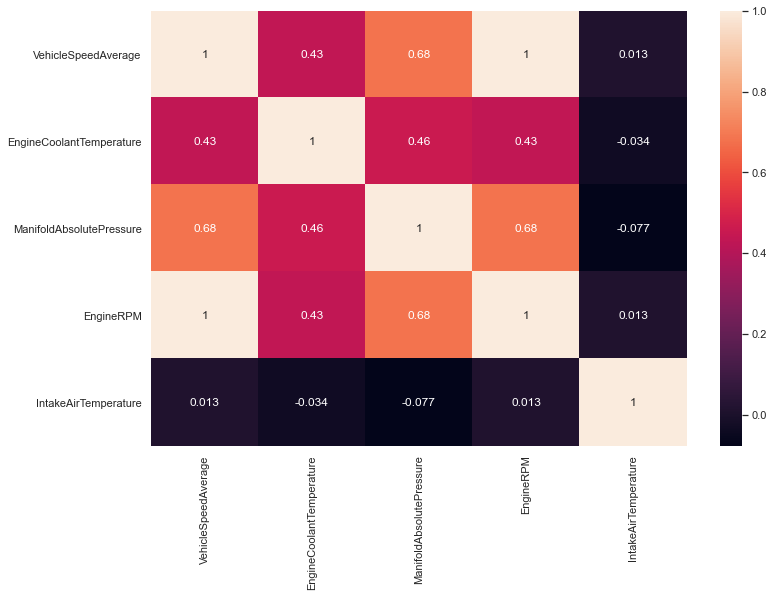

In [3]:
sns.set(rc={'figure.figsize': (12,8)})

corr = np.corrcoef(df1.corr())
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [4]:
df1['Style'] = df1['drivingStyle'].astype('category').cat.codes
df1['Congestion'] = df1['traffic'].astype('category').cat.codes
df1.head()

VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0            13.637810                        37                       100   
1            13.637810                        37                       100   
2            13.605983                        37                       100   
3            13.653724                        37                       100   
4            13.653724                        37                       100   

   EngineRPM  IntakeAirTemperature      roadSurface                  traffic  \
0        857                    21  SmoothCondition  HighCongestionCondition   
1        857                    21  SmoothCondition  HighCongestionCondition   
2        855                    21  SmoothCondition  HighCongestionCondition   
3        858                    20  SmoothCondition  HighCongestionCondition   
4        858                    21  SmoothCondition  HighCongestionCondition   

    drivingStyle  Style  Congestion  
0  EvenPaceStyle      1           0  
1  EvenPaceStyle      1           0  
2  EvenPaceStyle      1           0  
3  EvenPaceStyle      1           0  
4  EvenPaceStyle      1           0

In [6]:
df = df1.drop('drivingStyle',axis=1).drop('roadSurface',axis=1).drop('traffic',axis=1)
#df = df1.drop('drivingStyle',axis=1).drop('roadSurface',axis=1).drop('traffic',axis=1).drop('VehicleInstantSpeed',axis=1)
df.head()

VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0            13.637810                        37                       100   
1            13.637810                        37                       100   
2            13.605983                        37                       100   
3            13.653724                        37                       100   
4            13.653724                        37                       100   

   EngineRPM  IntakeAirTemperature  Style  Congestion  
0        857                    21      1           0  
1        857                    21      1           0  
2        855                    21      1           0  
3        858                    20      1           0  
4        858                    21      1           0

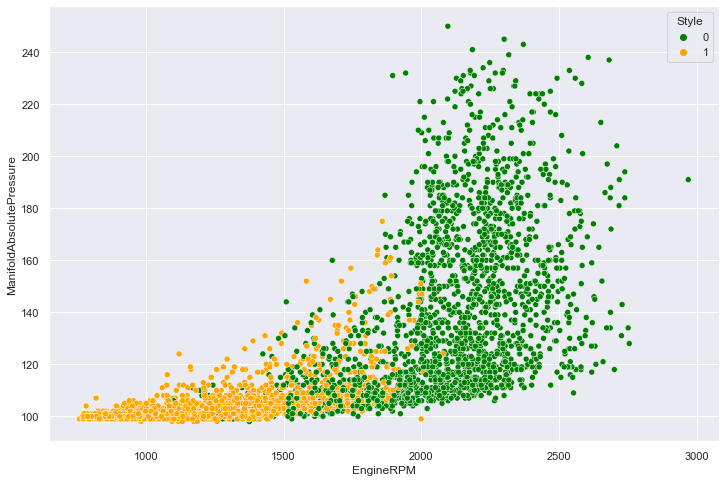

In [7]:
# Plotting the highest correlated pairs
sns.set_palette("bright")
sns.scatterplot(data=df1, x='EngineRPM', y='ManifoldAbsolutePressure', hue='Style', palette=['green','orange']),#'dodgerblue'])
plt.show()

In [9]:
X= df.drop('Style',axis=1).drop('Congestion',axis=1)
y=df['Congestion']
#y=df['Style']
print(X)
print(y)

      VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0               13.637810                        37                       100   
1               13.637810                        37                       100   
2               13.605983                        37                       100   
3               13.653724                        37                       100   
4               13.653724                        37                       100   
...                   ...                       ...                       ...   
3995            30.585614                        82                       112   
3996            28.803310                        82                       111   
3997            27.291534                        82                       110   
3998            24.649905                        82                       109   
3999            21.180777                        82                       107   

      EngineRPM  IntakeAirT

In [10]:
df1 = df

df = X.join(pd.Series(y, name='class'))
print(df)
class_feature_means = pd.DataFrame(columns=[0,1])
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
cfm = class_feature_means.drop('class')
cfm

      VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0               13.637810                        37                       100   
1               13.637810                        37                       100   
2               13.605983                        37                       100   
3               13.653724                        37                       100   
4               13.653724                        37                       100   
...                   ...                       ...                       ...   
3995            30.585614                        82                       112   
3996            28.803310                        82                       111   
3997            27.291534                        82                       110   
3998            24.649905                        82                       109   
3999            21.180777                        82                       107   

      EngineRPM  IntakeAirT

0            1            2
VehicleSpeedAverage         24.949781    25.977767    25.431108
EngineCoolantTemperature    63.959149    75.266164    71.326109
ManifoldAbsolutePressure   120.222128   120.830819   124.839009
EngineRPM                 1567.844255  1632.442888  1598.090815
IntakeAirTemperature        18.182979    18.844828    18.696594

In [11]:
df1 = X

In [12]:
within_class_scatter_matrix = np.zeros((5,5))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((5,5))
    for index, row in rows.iterrows():
        x = row.values.reshape(5,1)
        mc = cfm[c].values.reshape(5,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix.shape

(5, 5)

In [13]:
feature_means = df1.mean()
between_class_scatter_matrix = np.zeros((5,5))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index) 
    print(n)
    mc = cfm[c].values.reshape(5,1)
    m = feature_means.values.reshape(5,1)
    between_class_scatter_matrix += n*((mc - m).dot((mc - m).T))
between_class_scatter_matrix.shape

1175
1856
969


(5, 5)

In [14]:
eigen_values, eigen_vectors = np.linalg.eig((np.linalg.inv(within_class_scatter_matrix)).dot(between_class_scatter_matrix))

In [15]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

0.16022860075057854
0.007644980831963261
0.006738569101464058
0.000524717930240165
3.1202893953980686e-18


In [16]:
#w_matrix = np.hstack((pairs[0][1].reshape(5,1), pairs[1][1].reshape(5,1))).real
w_matrix = np.hstack((pairs[0][1].reshape(5,1), pairs[1][1].reshape(5,1),pairs[2][1].reshape(5,1))).real
w_matrix.shape

(5, 3)

In [17]:
X_lda = np.array(X.dot(w_matrix))
print(X_lda.shape)

(4000, 3)


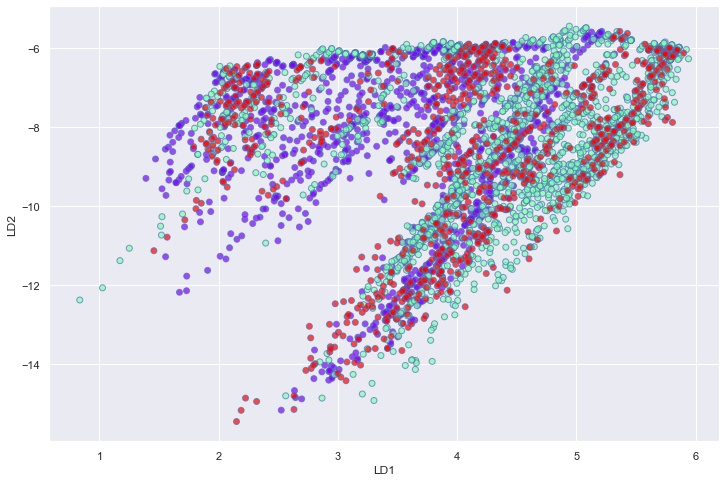

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [19]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc
C=1.0
Y1 = pd.DataFrame(X_lda)
# Run classifier
classifier11 = svm.SVC(kernel='linear', C=C)
classifier11.fit(Y1,y)

SVC(kernel='linear')

ValueError: Filler values must be provided when X has more than 2 training features.

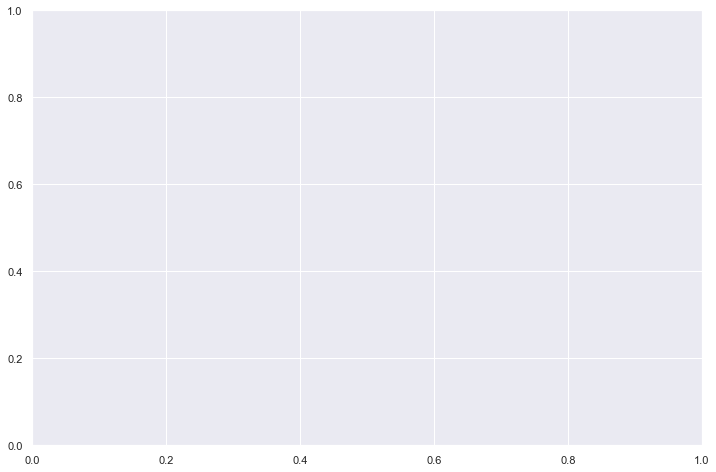

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_lda, y, clf=classifier11, legend=2, zoom_factor=80)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('SVM of Vehicle dataset')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(Y1, y, test_size=0.1, random_state=1)

# Run classifier
classifier1 = svm.SVC(kernel='sigmoid', probability=True)
probas_1 = classifier1.fit(trainX, trainy).predict_proba(testX)
y_predict1 = classifier1.predict(testX)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(testy, y_predict1))
confusion = pd.DataFrame(cm)
print(confusion)

    0   1   2
0  47  20  61
1  86  52  51
2  30  15  38


In [23]:
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Accuracy :  0.2475


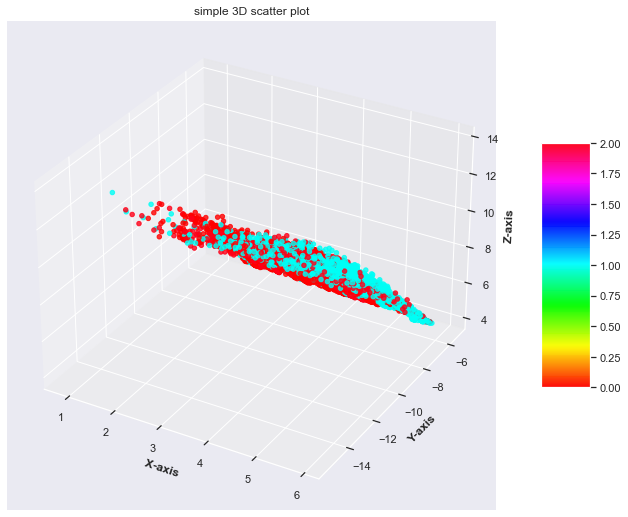

In [24]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(X_lda[:,0], X_lda[:,1], X_lda[:,2], alpha = 0.8, c = y, cmap = my_cmap)
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [25]:
import plotly.express as px
df = X_lda
fig = px.scatter_3d(df, x=X_lda[:,0], y=X_lda[:,1], z=X_lda[:,2], color = y)
fig.show()